In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
class Model:
    """
    Class untuk menyimpan data-data performa setiap model yang dibuat.
    """
    def __init__(self, y_pred):
        """
        Fungsi inisialisasi untuk menyimpan performa model.
        :param y_pred: <pandas dataframe> output y hasil prediksi model
        """
        self.accuracy = 0
        self.precision = 0
        self.recall = 0
        self.f1 = 0
        self.y_pred = y_pred
        self.auc = 0
        
    def checkAccuracy(self, y_true):
        """
        Fungsi untuk menghitung akurasi hasil prediksi jika dibandingkan dengan output seharusnya.
        :param y_true: <pandas dataframe> output yang seharusnya
        :param y_pred: <pandas datafram> output hasil prediksi
        """

        # Visualisasi Confusion Matrix
        confusion_matrix = metrics.confusion_matrix(y_true, self.y_pred)
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
        cm_display.plot()
        plt.xlabel("Prediction")
        plt.ylabel("Actual")
        plt.show()
        
        # Menghitung akurasi
        self.accuracy = np.round(accuracy_score(y_true, self.y_pred),2)
        self.precision = np.round(precision_score(y_true, self.y_pred),2)
        self.recall = np.round(recall_score(y_true, self.y_pred),2)
        self.f1 = np.round(f1_score(y_true, self.y_pred),2)
        
        # Menampilkan akurasi
        print("Accuracy:", self.accuracy)
        print("Precision:", self.precision)
        print("Recall:", self.recall)
        print("F1 score:", self.f1)

        return 
    
    
    def printAccuracy(self):
        """
        Fungsi untuk menampilkan seluruh data performa model.
        """
        print("Accuracy:", self.accuracy)
        print("Precision:", self.precision)
        print("Recall:", self.recall)
        print("F1 score:", self.f1)
        print("AUC:", self.auc)
    
    
    def plotROC(self, y_true):
        """
        Fungsi untuk menampilkan visualisasi ROC Curve.
        :param y_true: output y yang seharusnya
        """
        fpr, tpr, thresholds = roc_curve(y_true, self.y_pred)
        self.auc = np.round(roc_auc_score(y_true, self.y_pred),2)
        
        plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % self.auc)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate (Recall)')
        plt.title('ROC Curve with AUC')
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.show()

In [3]:
df = pd.read_csv(r'D:\Intern Data Scientist Home Credit Indonesia\Final Project\home-credit-default-risk\application_train.csv')

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

INSIGHT FROM DATASET

In [15]:
# Menghitung frekuensi setiap nilai di kolom output
frekuensi = df['TARGET'].value_counts()
# Menghitung persentase
persentase = df['TARGET'].value_counts(normalize=True) * 100

print("Frekuensi:")
print(frekuensi)
print("\nPersentase:")
print(persentase)

Frekuensi:
TARGET
0    282686
1     24825
Name: count, dtype: int64

Persentase:
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


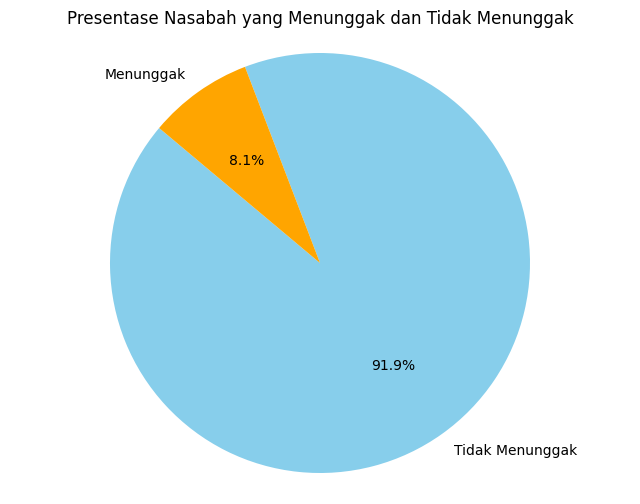

In [17]:
# Data untuk pie chart
labels = ['Tidak Menunggak', 'Menunggak']
sizes = persentase

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Presentase Nasabah yang Menunggak dan Tidak Menunggak')
plt.show()

Kesimpulan:
    
    Dari keseluruhan klien yang melakukan peminjaman, terdapat 8% klien yang memiliki kesulitan dalam melakukan proses pelunasan cicilan.

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64


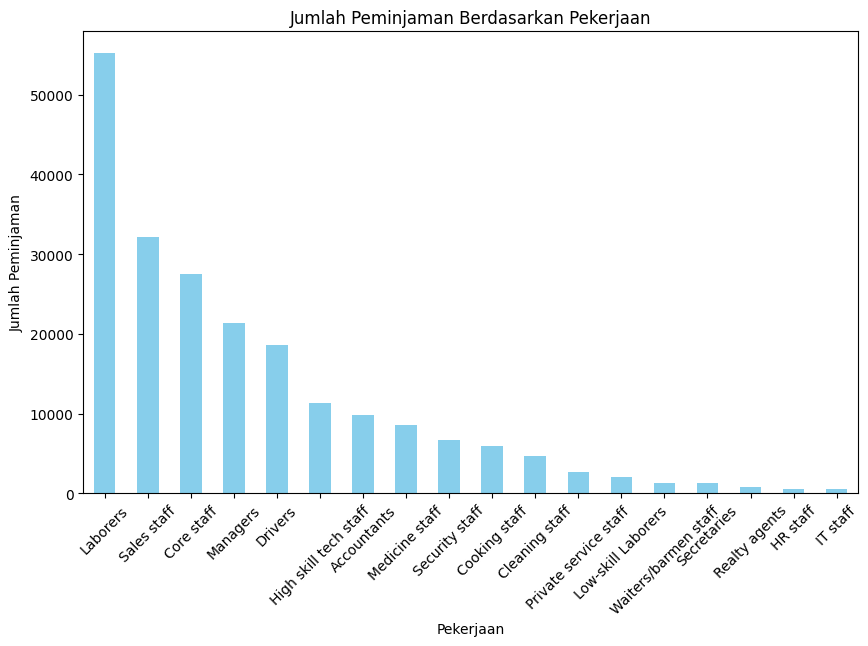

In [5]:
# Menghitung jumlah nasabah yang melakukan peminjaman berdasarkan pekerjaan
peminjaman_per_pekerjaan = df['OCCUPATION_TYPE'].value_counts()

# Menampilkan hasil
print(peminjaman_per_pekerjaan)

# Membuat bar chart
plt.figure(figsize=(10, 6))
peminjaman_per_pekerjaan.plot(kind='bar', color='skyblue')
plt.title('Jumlah Peminjaman Berdasarkan Pekerjaan')
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.show()

                       Total  Menunggak  Tidak Menunggak  Persentase Menunggak
OCCUPATION_TYPE                                                               
Accountants             9813        474             9339                  4.83
High skill tech staff  11380        701            10679                  6.16
Managers               21371       1328            20043                  6.21
Core staff             27570       1738            25832                  6.30
HR staff                 563         36              527                  6.39
IT staff                 526         34              492                  6.46
Private service staff   2652        175             2477                  6.60
Medicine staff          8537        572             7965                  6.70
Secretaries             1305         92             1213                  7.05
Realty agents            751         59              692                  7.86
Cleaning staff          4653        447             

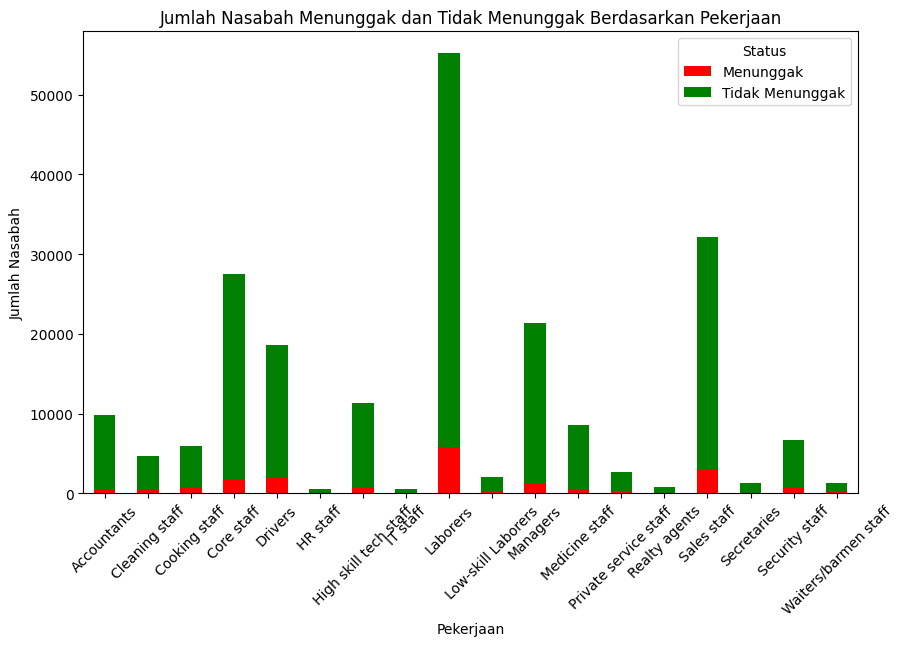

In [13]:
# Mengelompokkan data berdasarkan pekerjaan dan output
grouped = df.groupby(['OCCUPATION_TYPE', 'TARGET']).size().unstack(fill_value=0)

# Menghitung total dan persentase penunggak
grouped['Total'] = grouped.sum(axis=1)
grouped['Persentase Menunggak'] = (grouped[1] / grouped['Total']) * 100

# Membulatkan persentase ke dua angka desimal
grouped['Persentase Menunggak'] = grouped['Persentase Menunggak'].round(2)

# Menyusun ulang kolom untuk tampilan yang lebih rapi
grouped = grouped[['Total', 1, 0, 'Persentase Menunggak']]
grouped.columns = ['Total', 'Menunggak', 'Tidak Menunggak', 'Persentase Menunggak']


# Mengurutkan berdasarkan persentase penunggak terkecil
grouped_sorted_by_percentation = grouped.sort_values(by='Persentase Menunggak')

# Mengurutkan berdasarkan total terkecil
grouped_sorted_by_total = grouped.sort_values(by='Total')

print(grouped_sorted_by_percentation)
print("\n==================================================================\n")

print(grouped_sorted_by_total)


# Membuat bar chart untuk visualisasi
grouped[['Menunggak', 'Tidak Menunggak']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.title('Jumlah Nasabah Menunggak dan Tidak Menunggak Berdasarkan Pekerjaan')
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

In [78]:
df['OCCUPATION_TYPE'].value_counts()

KeyError: 'OCCUPATION_TYPE'

DATA PROCESSING

In [10]:
#cek data duplicate
duplicate_status = df.duplicated()
duplicate_status.sum()

0

In [11]:
#cek data kosong
null_columns = df.isnull().sum()
all_null_columns = null_columns[null_columns > 0]
all_null_columns

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64

In [12]:
#data dengan presentase missing value > 50%
percentage_null = (df.isnull().mean() * 100)
selected_columns = percentage_null[percentage_null > 50]
selected_columns

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

In [13]:
list_columns = selected_columns.index.tolist()
print(list_columns)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [14]:
#hapus kolom dengan kekosongan lebih dari 50%

df.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [16]:
#mengganti missing value pada data object dengan modus

object_columns = df.select_dtypes(include=['object'])
mode_values = object_columns.mode().iloc[0]
df[object_columns.columns] = object_columns.fillna(mode_values)

In [17]:
#mengganti missing value pada data number kategorikal dengan modus
number_columns = df.select_dtypes(include=['number'])
unique_values_on_number = number_columns.apply(lambda col: col.unique())
categorical_columns = number_columns.loc[:, unique_values_on_number.apply(len) <= 5]
mode_values = categorical_columns.mode().iloc[0]
df[categorical_columns.columns] = categorical_columns.fillna(mode_values)


In [18]:
#mengganti missing value pada data number (yang bukan kategorikal) dengan median, karena tidak berdistribusi normal
df[number_columns.columns] = number_columns.apply(lambda col: col.fillna(col.median()), axis=0)


In [19]:
#cek lagi data kosong
null_columns = df.isnull().sum()
all_null_columns = null_columns[null_columns > 0]
all_null_columns

Series([], dtype: int64)

In [20]:
#one hot endocing
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(df[object_columns.columns])
onehot_encoded_df = pd.DataFrame(onehot_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(object_columns.columns))
df = pd.concat([df.drop(columns=object_columns.columns), onehot_encoded_df], axis=1)
df


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
#mengubah input negatif menjadi positif

number_columns = df.select_dtypes(include=['number'])
object_columns = df.select_dtypes(exclude=['number'])


import numpy as np

for col in number_columns:
    df[col] = np.where(df[col] < 0, abs(df[col]), df[col])

df = pd.concat([object_columns, df], axis=1)
df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


best_features = SelectKBest(score_func = chi2, k = 10)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)
feature_scores = pd.concat([df_columns, df_scores], axis = 1)
feature_scores.columns = ['Features', 'Score']
feature_scores.sort_values(by = ['Score'], ascending = False).reset_index(drop=True)

In [26]:
#seleksi fitur dengan chi2

X = df.drop(["TARGET"], axis = 1)
y = df["TARGET"]

feature_selector = SelectKBest(chi2, k = "all")
fit = feature_selector.fit(X,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "chi2_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["chi2_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = X[selected_variables]
X_new.head()

,SK_ID_CURR,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,NAME_HOUSING_TYPE_Office apartment,OCCUPATION_TYPE_Private service staff,NAME_TYPE_SUITE_Other_B,EMERGENCYSTATE_MODE_Yes,NAME_INCOME_TYPE_Maternity leave,WEEKDAY_APPR_PROCESS_START_MONDAY,FLAG_DOCUMENT_9,WEEKDAY_APPR_PROCESS_START_TUESDAY,FLAG_DOCUMENT_11,ORGANIZATION_TYPE_Industry: type 4
0,100002,1134.0,202500.0,406597.5,24700.5,351000.0,2120,9461,637,3648.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
1,100003,828.0,270000.0,1293502.5,35698.5,1129500.0,291,16765,1188,1186.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0,0.0
2,100004,815.0,67500.0,135000.0,6750.0,135000.0,2531,19046,225,4260.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0,0.0
3,100006,617.0,135000.0,312682.5,29686.5,297000.0,2437,19005,3039,9833.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
4,100007,1106.0,121500.0,513000.0,21865.5,513000.0,3458,19932,3038,4311.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0


In [27]:
#standardizing data

def standardizerData(data):
    """
    Fungsi untuk melakukan standarisasi data
    :param data: <pandas dataframe> sampel data
    :return standardized_data: <pandas dataframe> sampel data standard
    :return standardizer: method untuk standardisasi data
    """
    data_columns = data.columns  # agar nama kolom tidak hilang
    data_index = data.index  # agar index tidak hilang

    # buat (fit) standardizer
    standardizer = StandardScaler()
    standardizer.fit(data)

    # transform data
    standardized_data_raw = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data_raw)
    standardized_data.columns = data_columns
    standardized_data.index = data_index

    return standardized_data, standardizer

In [28]:
# standardizing data
X_clean, standardizer = standardizerData(data = X_new)
X_clean.head()

,SK_ID_CURR,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,NAME_HOUSING_TYPE_Office apartment,OCCUPATION_TYPE_Private service staff,NAME_TYPE_SUITE_Other_B,EMERGENCYSTATE_MODE_Yes,NAME_INCOME_TYPE_Maternity leave,WEEKDAY_APPR_PROCESS_START_MONDAY,FLAG_DOCUMENT_9,WEEKDAY_APPR_PROCESS_START_TUESDAY,FLAG_DOCUMENT_11,ORGANIZATION_TYPE_Industry: type 4
0,-1.733423,0.206992,0.142129,-0.478095,-0.166143,-0.507236,-0.579154,-1.506880,-0.481110,-0.379837,...,-0.092646,-0.093269,-0.076087,-0.08734,-0.004032,-0.444395,-0.062538,-0.461015,-0.062669,-0.05348
1,-1.733413,-0.163107,0.426792,1.725450,0.592683,1.600873,-1.790855,0.166821,-0.477159,-1.078697,...,-0.092646,-0.093269,-0.076087,-0.08734,-0.004032,2.250251,-0.062538,-0.461015,-0.062669,-0.05348
2,-1.733403,-0.178831,-0.427196,-1.152888,-1.404669,-1.092145,-0.306869,0.689509,-0.484065,-0.206116,...,-0.092646,-0.093269,-0.076087,-0.08734,-0.004032,2.250251,-0.062538,-0.461015,-0.062669,-0.05348
3,-1.733384,-0.418306,-0.142533,-0.711430,0.177874,-0.653463,-0.369143,0.680114,-0.463885,1.375829,...,-0.092646,-0.093269,-0.076087,-0.08734,-0.004032,-0.444395,-0.062538,-0.461015,-0.062669,-0.05348
4,-1.733374,0.173126,-0.199466,-0.213734,-0.361749,-0.068554,0.307263,0.892535,-0.463892,-0.191639,...,-0.092646,-0.093269,-0.076087,-0.08734,-0.004032,-0.444395,-0.062538,-0.461015,-0.062669,-0.05348


#MODELING WITH OVERSAMPLING DATA

In [37]:
#Oversampling Data Imbalance
ov = SMOTE(random_state = 123)
x_over, y_over = ov.fit_resample(X_clean, y.ravel())
x_train_over, x_test_over, y_train_over, y_test_over = train_test_split(x_over, y_over, test_size=0.2, random_state=123)

LOGISTIC REGRESSION

In [38]:
# Model Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 123, class_weight='balanced')
logreg.fit(x_train_over, y_train_over)

c:\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=123)

Akurasi LogReg di Data Training:


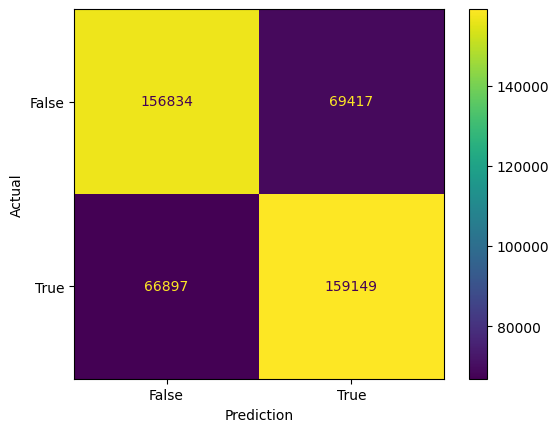

Accuracy: 0.7
Precision: 0.7
Recall: 0.7
F1 score: 0.7

Akurasi LogReg di Data Test:


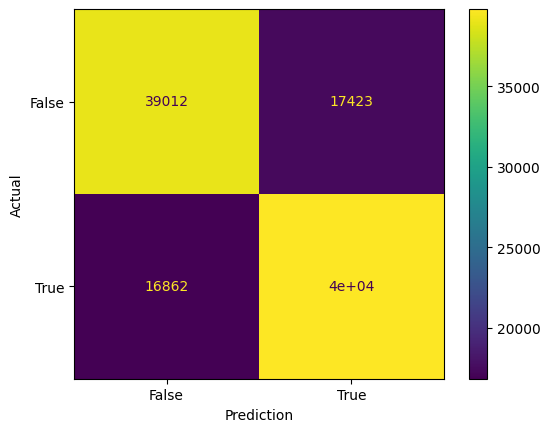

Accuracy: 0.7
Precision: 0.7
Recall: 0.7
F1 score: 0.7


In [39]:
# Prediksi LogReg di data training
y_train_pred_logreg = pd.DataFrame(logreg.predict(x_train_over))

# Prediksi LogReg di data test
y_test_pred_logreg = pd.DataFrame(logreg.predict(x_test_over))

# Cek akurasi
print("Akurasi LogReg di Data Training:")
logreg_train = Model(y_train_pred_logreg)
logreg_train.checkAccuracy(y_train_over)

print("")
print("Akurasi LogReg di Data Test:")
logreg_test = Model(y_test_pred_logreg)
logreg_test.checkAccuracy(y_test_over)

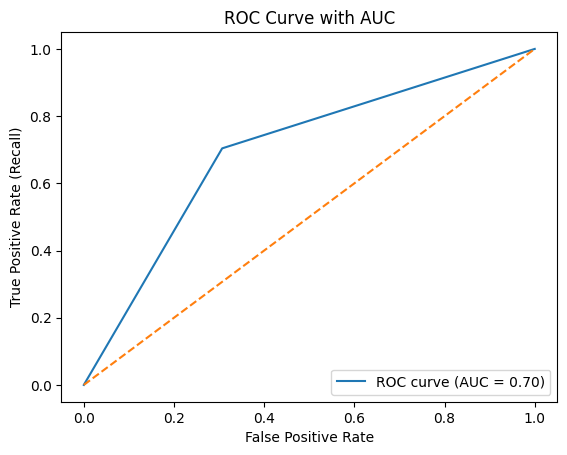

In [41]:
logreg_train.plotROC(y_train_over)

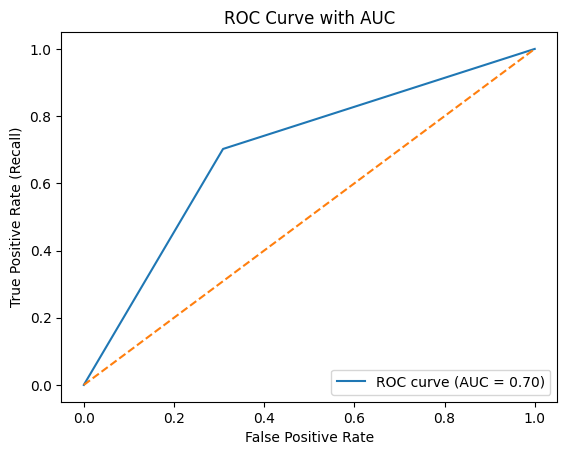

In [42]:
logreg_test.plotROC(y_test_over)

RANDOM FORREST

In [43]:
# Model Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 123, n_estimators = 30)
random_forest.fit(x_train_over, y_train_over)

RandomForestClassifier(n_estimators=30, random_state=123)

Akurasi RF di Data Training:


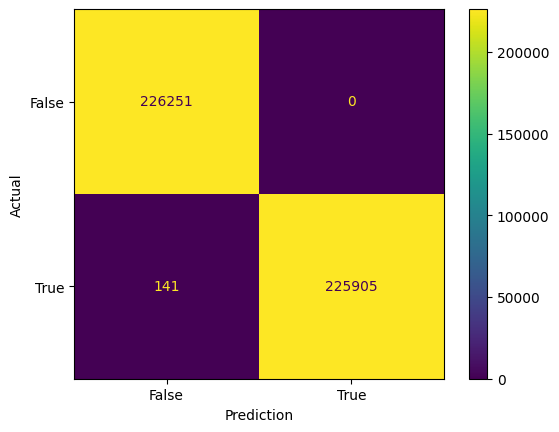

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0

Akurasi RF di Data Test:


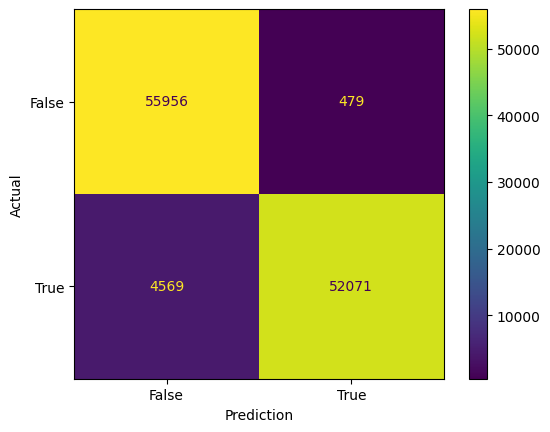

Accuracy: 0.96
Precision: 0.99
Recall: 0.92
F1 score: 0.95


In [44]:
# Prediksi Random Forest di data training
y_train_pred_rf = pd.DataFrame(random_forest.predict(x_train_over))

# Prediksi Random Forest di data test
y_test_pred_rf = pd.DataFrame(random_forest.predict(x_test_over))

# Cek akurasi
print("Akurasi RF di Data Training:")
rf_train = Model(y_train_pred_rf)
rf_train.checkAccuracy(y_train_over)

print("")
print("Akurasi RF di Data Test:")
rf_test = Model(y_test_pred_rf)
rf_test.checkAccuracy(y_test_over)

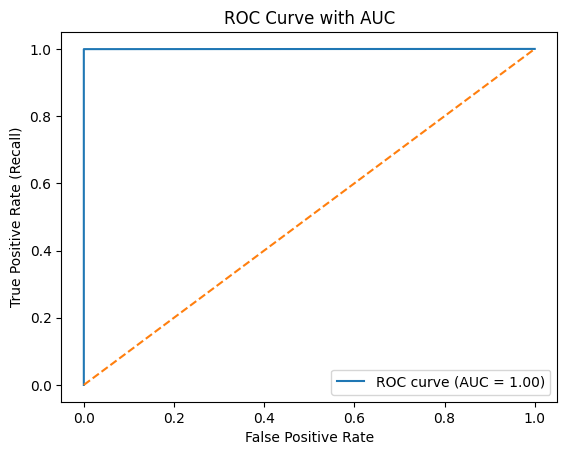

In [45]:
rf_train.plotROC(y_train_over)

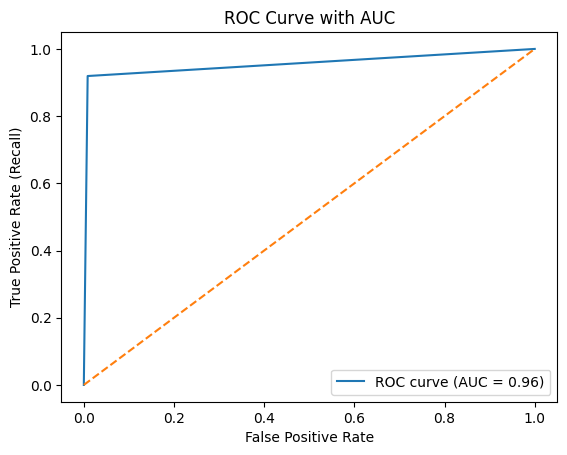

In [46]:
rf_test.plotROC(y_test_over)

#MODELING WITH UNDERSAMPLING DATA

In [47]:
us = RandomUnderSampler(random_state=123)
x_under, y_under = us.fit_resample(X_clean, y.ravel())
x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(x_under, y_under, test_size=0.2, random_state=123)

LOGISTIC REGRESSION

In [48]:
# Model Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 123, class_weight='balanced')
logreg.fit(x_train_under, y_train_under)

c:\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=123)

Akurasi LogReg di Data Training:


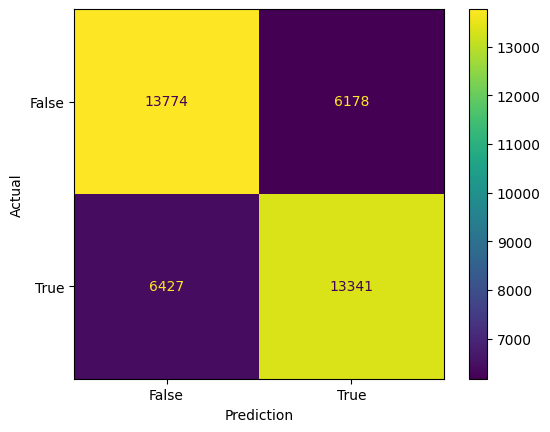

Accuracy: 0.68
Precision: 0.68
Recall: 0.67
F1 score: 0.68

Akurasi LogReg di Data Test:


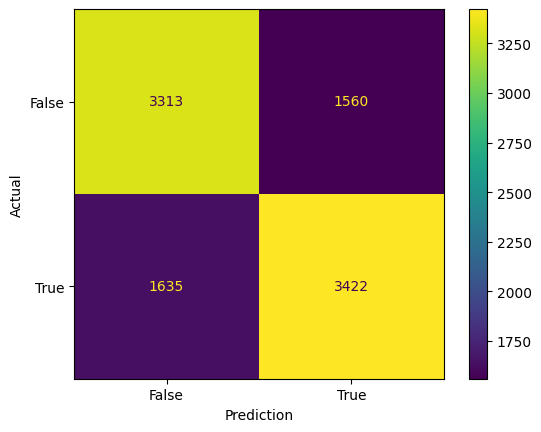

Accuracy: 0.68
Precision: 0.69
Recall: 0.68
F1 score: 0.68


In [49]:
# Prediksi LogReg di data training
y_train_pred_logreg = pd.DataFrame(logreg.predict(x_train_under))

# Prediksi LogReg di data test
y_test_pred_logreg = pd.DataFrame(logreg.predict(x_test_under))

# Cek akurasi
print("Akurasi LogReg di Data Training:")
logreg_train = Model(y_train_pred_logreg)
logreg_train.checkAccuracy(y_train_under)

print("")
print("Akurasi LogReg di Data Test:")
logreg_test = Model(y_test_pred_logreg)
logreg_test.checkAccuracy(y_test_under)

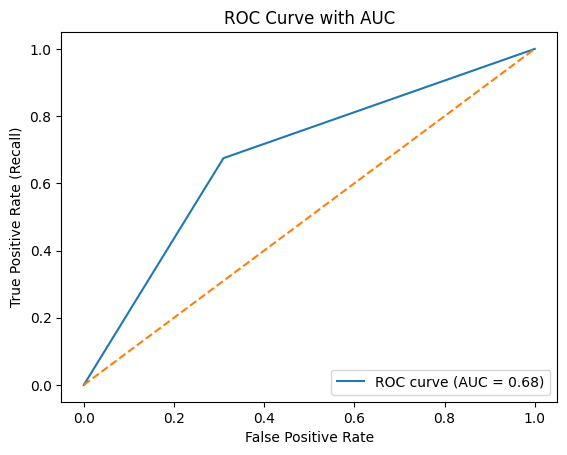

In [52]:
logreg_train.plotROC(y_train_under)

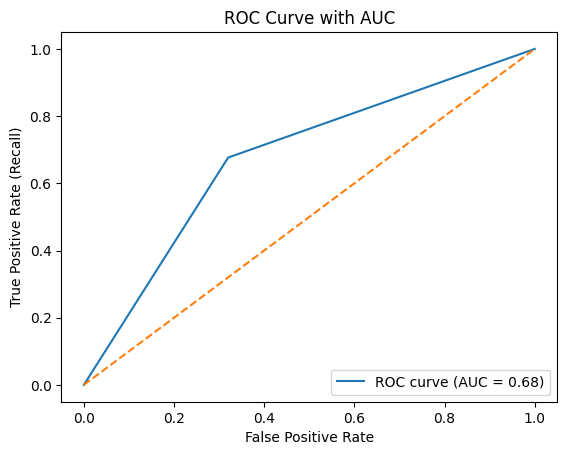

In [53]:
logreg_test.plotROC(y_test_under)

RANDOM FORREST

In [54]:
# Model Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 123, n_estimators = 30)
random_forest.fit(x_train_under, y_train_under)

RandomForestClassifier(n_estimators=30, random_state=123)

Akurasi RF di Data Training:


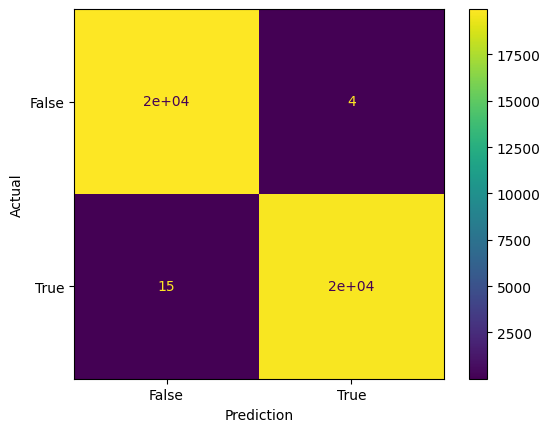

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0

Akurasi RF di Data Test:


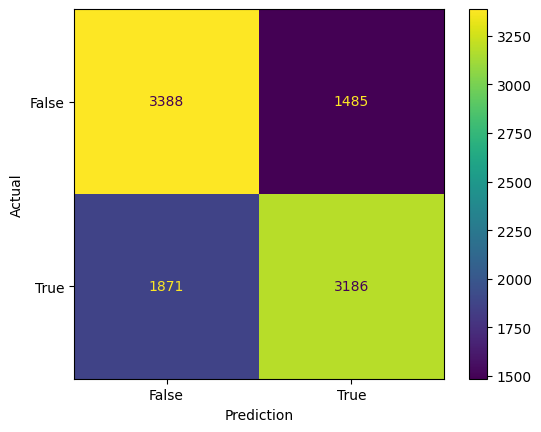

Accuracy: 0.66
Precision: 0.68
Recall: 0.63
F1 score: 0.66


In [56]:
# Prediksi Random Forest di data training
y_train_pred_rf = pd.DataFrame(random_forest.predict(x_train_under))

# Prediksi Random Forest di data test
y_test_pred_rf = pd.DataFrame(random_forest.predict(x_test_under))

# Cek akurasi
print("Akurasi RF di Data Training:")
rf_train = Model(y_train_pred_rf)
rf_train.checkAccuracy(y_train_under)

print("")
print("Akurasi RF di Data Test:")
rf_test = Model(y_test_pred_rf)
rf_test.checkAccuracy(y_test_under)

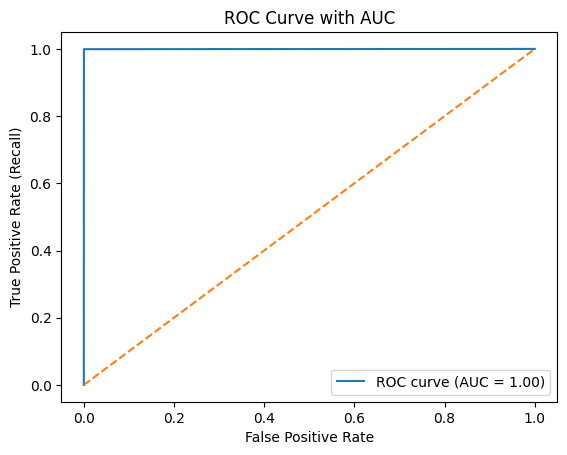

In [58]:
rf_train.plotROC(y_train_under)

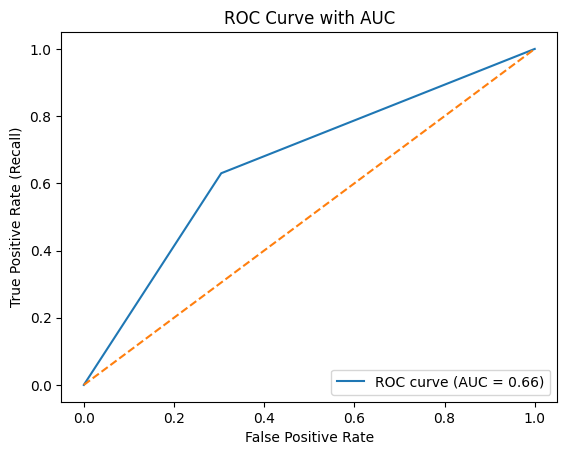

In [59]:
rf_test.plotROC(y_test_under)